In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv(os.path.join('..', 'data', 'raw', 'train.csv'), na_values=np.nan, low_memory=False)
df.head()

,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
0,p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
1,p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
2,p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
3,p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
4,p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


In [3]:
# read patient p_01
df_p01 = df[df['p_num'] == 'p01']
df_p01.head()

,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
0,p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
1,p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
2,p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
3,p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
4,p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


In [4]:
from datetime import datetime, timedelta

df_p01.loc[:, "time"] = pd.to_datetime(df_p01["time"], format="%H:%M:%S").dt.time
start_date = datetime(2020, 1, 1)
current_date = start_date
assigned_dates = []
last_time = None

for i, row in df_p01.iterrows():
    if last_time is None:
        last_time = row["time"]

    if row["time"] < last_time:
        current_date = current_date + timedelta(days=1)
    assigned_dates.append(current_date)
    last_time = row["time"]

df_p01 = df_p01.copy()
df_p01.loc[:, "date"] = assigned_dates
df_p01.loc[:, "datetime"] = df_p01.apply(lambda row: datetime.combine(row['date'], row['time']), axis=1)
df_p01.set_index("datetime", inplace=True)
df_p01 = df_p01.drop(columns=["date", "time"])

print(len(df_p01))
df_p01.head()


8459


,id,p_num,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 06:10:00,p01_0,p01,NaN,NaN,9.6,NaN,NaN,9.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
2020-01-01 06:25:00,p01_1,p01,NaN,NaN,9.7,NaN,NaN,9.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
2020-01-01 06:40:00,p01_2,p01,NaN,NaN,9.2,NaN,NaN,8.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
2020-01-01 06:55:00,p01_3,p01,NaN,NaN,8.7,NaN,NaN,8.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
2020-01-01 07:10:00,p01_4,p01,NaN,NaN,8.4,NaN,NaN,8.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


In [5]:
initial_resolution_in_seconds = (df_p01.index[1] - df_p01.index[0]).seconds
initial_resolution_in_minutes = initial_resolution_in_seconds / 60
initial_resolution = f"{int(initial_resolution_in_minutes)}min"
initial_resolution

'15min'

In [6]:
full_date_range = pd.date_range(start=df_p01.index.min(), end=df_p01.index.max(), freq='5min')
df_reindexed = df_p01.reindex(full_date_range)
df_reindexed.index.name = "datetime"
df_reindexed.head()

,id,p_num,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 06:10:00,p01_0,p01,NaN,NaN,9.6,NaN,NaN,9.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
2020-01-01 06:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 06:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 06:25:00,p01_1,p01,NaN,NaN,9.7,NaN,NaN,9.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
2020-01-01 06:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_p01 = df_reindexed.copy()
df_p01 = df_p01.drop(columns=["id"])
df_p01.loc[:, "p_num"] = "p01"
df_p01['initial_resolution'] = initial_resolution
df_p01.head()

,p_num,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,...,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00,initial_resolution
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 06:10:00,p01,NaN,NaN,9.6,NaN,NaN,9.7,NaN,NaN,9.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4,15min
2020-01-01 06:15:00,p01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15min
2020-01-01 06:20:00,p01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15min
2020-01-01 06:25:00,p01,NaN,NaN,9.7,NaN,NaN,9.2,NaN,NaN,8.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8,15min
2020-01-01 06:30:00,p01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15min


In [8]:
parameters = ['bg', 'insulin', 'carbs', 'hr', 'steps', 'cals', 'activity']
time_diffs = [
    '-0:00',
    '-0:05',
    '-0:10',
    '-0:15',
    '-0:20',
    '-0:25',
    '-0:30',
    '-0:35',
    '-0:40',
    '-0:45',
    '-0:50',
    '-0:55',
    '-1:00',
    '-1:05',
    '-1:10',
    '-1:15',
    '-1:20',
    '-1:25',
    '-1:30',
    '-1:35',
    '-1:40',
    '-1:45',
    '-1:50',
    '-1:55',
    '-2:00',
    '-2:05',
    '-2:10',
    '-2:15',
    '-2:20',
    '-2:25',
    '-2:30',
    '-2:35',
    '-2:40',
    '-2:45',
    '-2:50',
    '-2:55',
    '-3:00',
    '-3:05',
    '-3:10',
    '-3:15',
    '-3:20',
    '-3:25',
    '-3:30',
    '-3:35',
    '-3:40',
    '-3:45',
    '-3:50',
    '-3:55',
    '-4:00',
    '-4:05',
    '-4:10',
    '-4:15',
    '-4:20',
    '-4:25',
    '-4:30',
    '-4:35',
    '-4:40',
    '-4:45',
    '-4:50',
    '-4:55',
    '-5:00',
    '-5:05',
    '-5:10',
    '-5:15',
    '-5:20',
    '-5:25',
    '-5:30',
    '-5:35',
    '-5:40',
    '-5:45',
    '-5:50',
    '-5:55'
]

for parameter in parameters:
    for time_diff_id, t_diff in enumerate(time_diffs):
        if time_diff_id == 0:
            df_p01.loc[:, parameter] = df_p01[f'{parameter}-0:00']
            df_p01 = df_p01.drop(columns=[f'{parameter}-0:00'])
            continue
        if not df_p01.columns.str.contains(f"{parameter}{t_diff}").any():
            continue

        # shift the columns by the time difference and fill the last values with nan
        df_p01.loc[:, f"{parameter}{t_diff}"] = df_p01[f"{parameter}{t_diff}"].shift(-time_diff_id)
        df_p01.loc[df_p01.index[-time_diff_id:], f"{parameter}{t_diff}"] = np.nan

        # fill the parameter column with the first non-nan value
        df_p01[parameter] = df_p01[f'{parameter}'].combine_first(df_p01[f'{parameter}{t_diff}'])
        df_p01 = df_p01.drop(columns=[f'{parameter}{t_diff}'])

# order the columns
new_column_order = ['p_num'] + parameters + ['initial_resolution', 'bg+1:00']
df_p01 = df_p01[new_column_order]
df_p01

,p_num,bg,insulin,carbs,hr,steps,cals,activity,initial_resolution,bg+1:00
datetime,,,,,,,,,,
2020-01-01 06:10:00,p01,15.1,0.0417,NaN,NaN,NaN,NaN,NaN,15min,13.4
2020-01-01 06:15:00,p01,NaN,0.0417,NaN,NaN,NaN,NaN,NaN,15min,NaN
2020-01-01 06:20:00,p01,NaN,0.0417,NaN,NaN,NaN,NaN,NaN,15min,NaN
2020-01-01 06:25:00,p01,14.4,0.0417,NaN,NaN,NaN,NaN,NaN,15min,12.8
2020-01-01 06:30:00,p01,NaN,0.0417,NaN,NaN,NaN,NaN,NaN,15min,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-03-31 23:30:00,p01,NaN,0.0167,NaN,67.8,14.0,5.20,NaN,15min,NaN
2020-03-31 23:35:00,p01,4.8,0.0167,NaN,64.7,0.0,7.89,NaN,15min,7.7
2020-03-31 23:40:00,p01,NaN,0.0167,NaN,65.6,0.0,5.00,NaN,15min,NaN


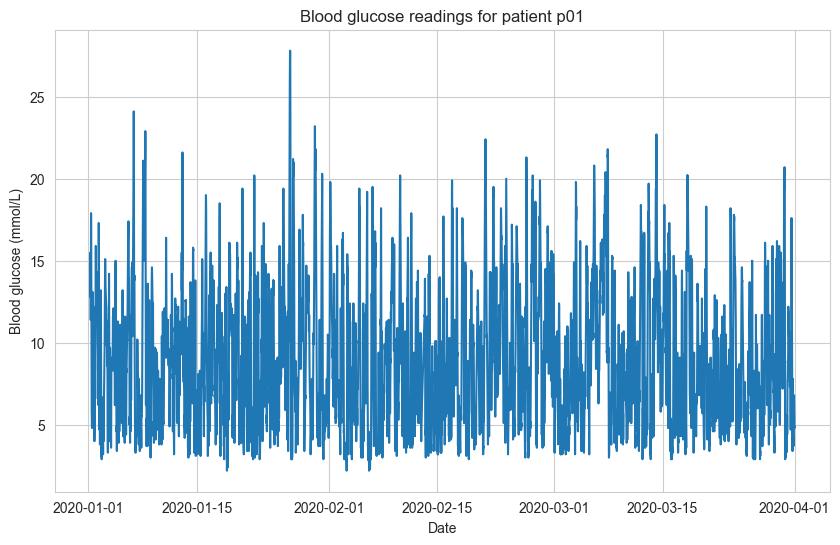

In [9]:
# plot the data
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x="datetime", y="bg", data=df_p01)
ax.set_title("Blood glucose readings for patient p01")
ax.set_ylabel("Blood glucose (mmol/L)")
ax.set_xlabel("Date")
plt.show();

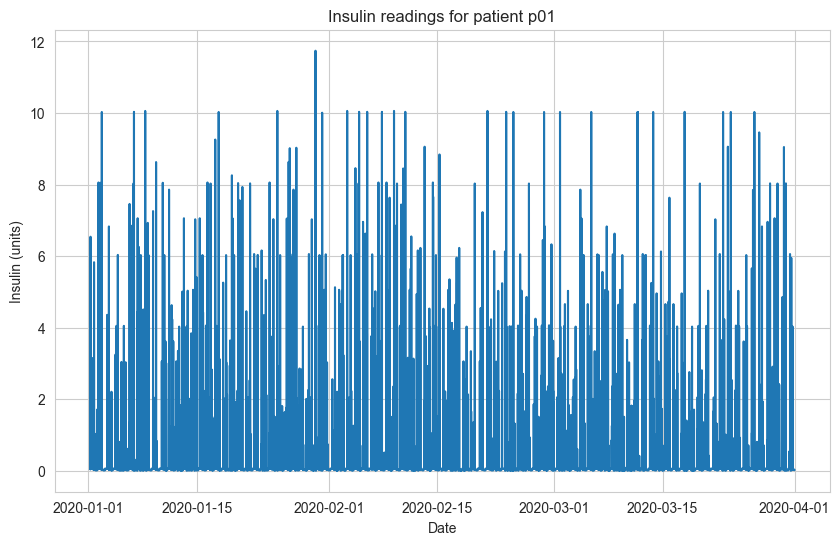

In [10]:
# plot the data
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x="datetime", y="insulin", data=df_p01)
ax.set_title("Insulin readings for patient p01")
ax.set_ylabel("Insulin (units)")
ax.set_xlabel("Date")
plt.show();


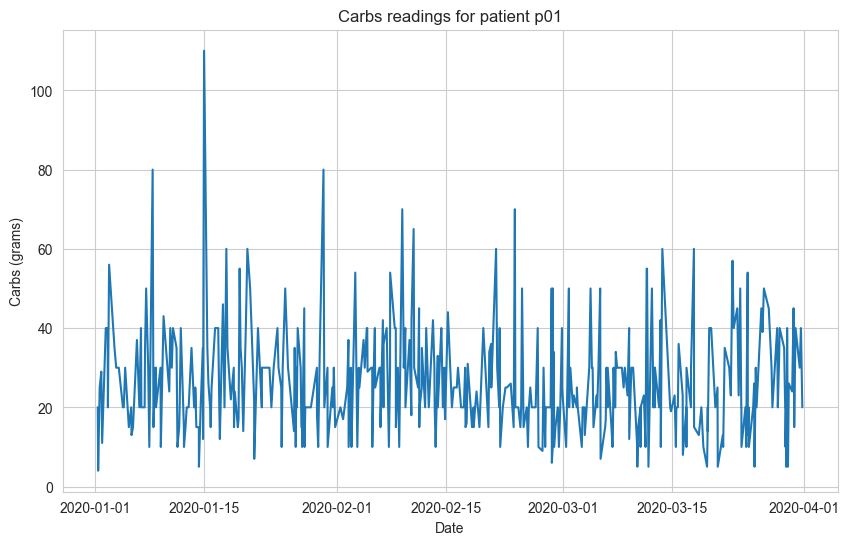

In [11]:
# plot the data
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x="datetime", y="carbs", data=df_p01)
ax.set_title("Carbs readings for patient p01")
ax.set_ylabel("Carbs (grams)")
ax.set_xlabel("Date")
plt.show();

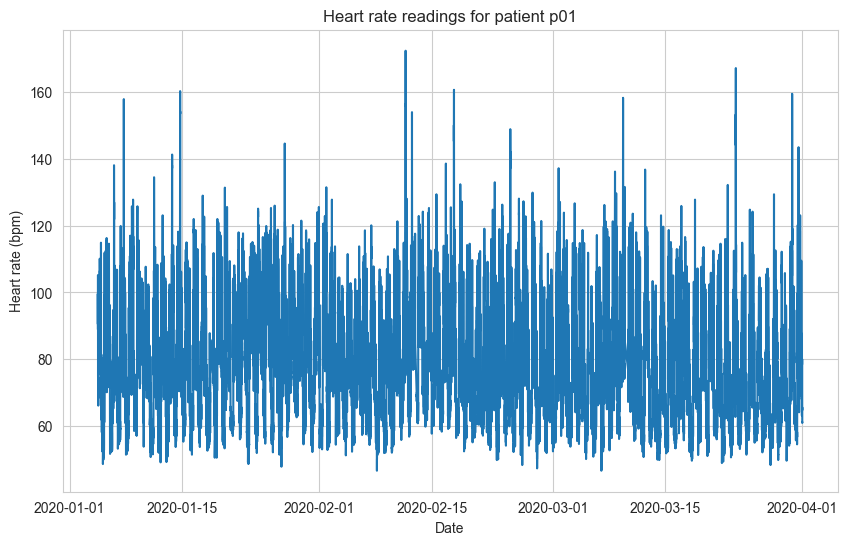

In [12]:
# plot the data
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x="datetime", y="hr", data=df_p01)
ax.set_title("Heart rate readings for patient p01")
ax.set_ylabel("Heart rate (bpm)")
ax.set_xlabel("Date")
plt.show();


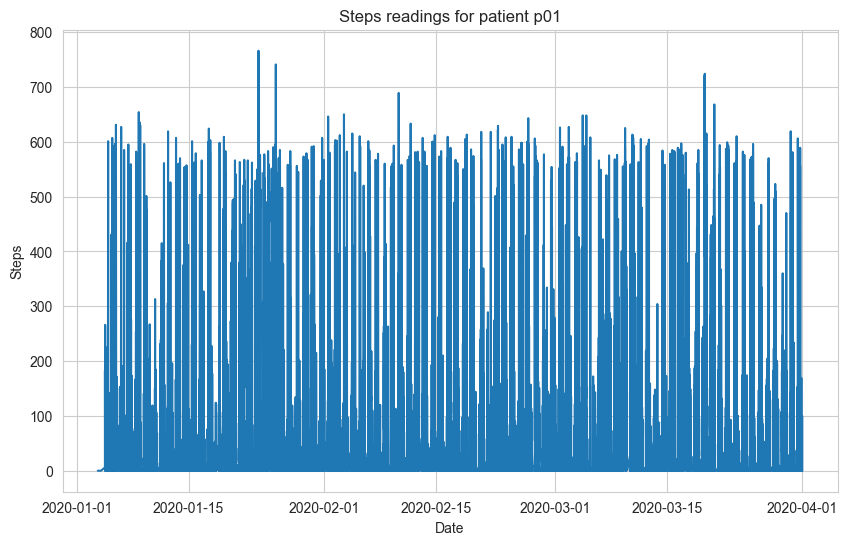

In [13]:
# plot the data
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x="datetime", y="steps", data=df_p01)
ax.set_title("Steps readings for patient p01")
ax.set_ylabel("Steps")
ax.set_xlabel("Date")
plt.show();


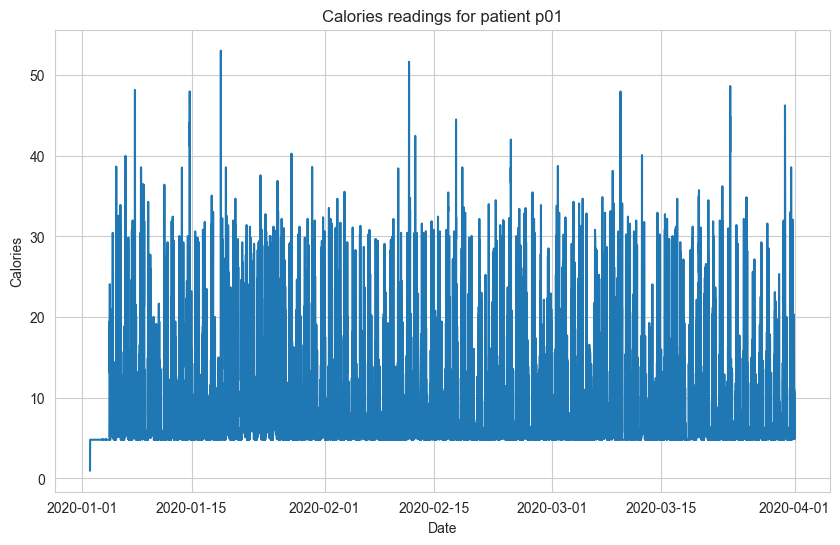

In [14]:
# plot the data
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x="datetime", y="cals", data=df_p01)
ax.set_title("Calories readings for patient p01")
ax.set_ylabel("Calories")
ax.set_xlabel("Date")
plt.show();

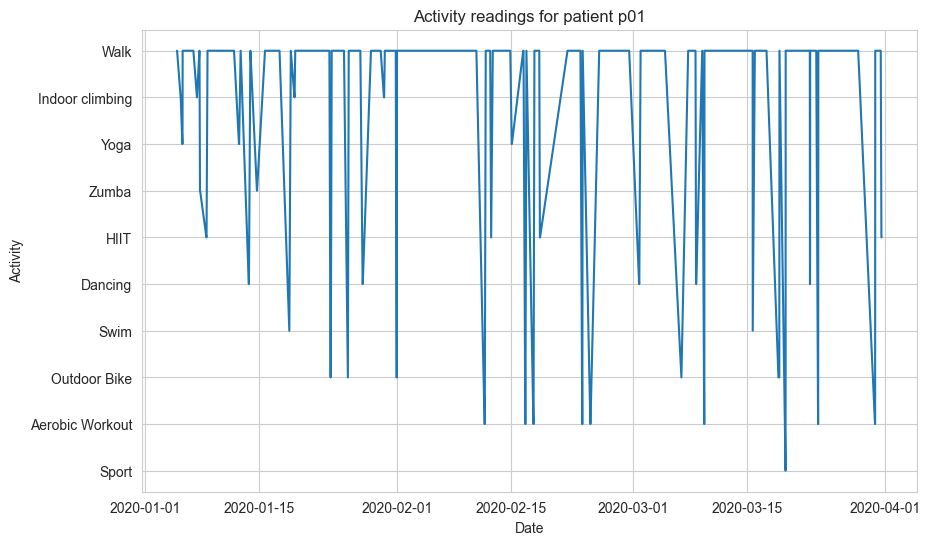

In [15]:
# plot the data
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x="datetime", y="activity", data=df_p01)
ax.set_title("Activity readings for patient p01")

ax.set_ylabel("Activity")
ax.set_xlabel("Date")
plt.show();
